In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import matplotlib.pyplot as plt
import seaborn as sns
import jieba
import re
import string
import glob

# 设置文件路径
input_folder_path = 'D:/CITYU/5507/作业/豆瓣十七个组/'  # 文件夹路径
output_folder_path = 'D:/CITYU/5507/作业/结果/'  # 输出文件夹路径

# 确保输出文件夹存在
os.makedirs(output_folder_path, exist_ok=True)

# 读取停用词文件
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        stop_words = set(f.read().strip().splitlines())
    return stop_words

# 加载停用词
stop_words = load_stopwords(r"D:\CITYU\5507\作业\停用词\cn_stopwords.txt")

# 定义预处理函数
def preprocess_chinese(text):
    if pd.isna(text):  # 检查是否为 NaN
        return ""  # 返回空字符串
    if not isinstance(text, str):  # 确保输入是字符串
        text = str(text)  # 将非字符串类型转换为字符串
    
    # 转换为小写
    text = text.lower()
    
    # 移除标点符号
    text = re.sub(f"[{string.punctuation}]", " ", text)
    
    # 使用jieba进行分词
    tokens = jieba.lcut(text)
    
    # 移除停用词
    tokens = [word for word in tokens if word not in stop_words]
    
    # 移除短词
    tokens = [word for word in tokens if len(word) > 1]
    
    return " ".join(tokens)

# 获取所有CSV文件
csv_files = glob.glob(os.path.join(input_folder_path, '*.csv'))

# 创建一个空的DataFrame来合并所有文件
combined_df = pd.DataFrame()

for input_file_path in csv_files:
    print(f"Processing file: {input_file_path}")
    
    # 读取CSV文件
    df = pd.read_csv(input_file_path)

    # 清理列名
    df.columns = df.columns.str.strip()

    # 确保列名为'post_content'
    if 'post_content' not in df.columns:
        raise ValueError(f"DataFrame中没有'post_content'列，请检查列名：{input_file_path}。")

    # 去掉不需要的列
    columns_to_drop = ['username', 'post_time', 'url']
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

    # 处理缺失值 - 这里选择将 NaN 值填充为一个特定的字符串（例如 "缺失内容"）
    df['post_content'].fillna("缺失内容", inplace=True)

    # 对'post_content'列进行预处理并合并
    df['Processed_post_content'] = df['post_content'].apply(preprocess_chinese)
    combined_df = pd.concat([combined_df, df[['Processed_post_content']]], ignore_index=True)

# 创建TF-IDF向量化器
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_df['Processed_post_content'])

# 获取词汇表和TF-IDF矩阵
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# 选择前n个特征进行可视化
n = 10  # 选择前10个特征
top_n_features = tfidf_df.sum().nlargest(n).index  # 选择TF-IDF值最大的特征

# 绘制热图
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_df[top_n_features].T, cmap='viridis', annot=True, fmt='.2f', cbar=True)
plt.title('Unified TF-IDF Heatmap')
plt.xlabel('Documents')
plt.ylabel('Top Features')

# 保存热图
plt.savefig(os.path.join(output_folder_path, 'unified_tfidf_heatmap.png'))
plt.close()  # 关闭图像以释放内存

# 可选：保存TF-IDF结果到CSV文件
output_file_path = os.path.join(output_folder_path, 'unified_tfidf_results.csv')
tfidf_df.to_csv(output_file_path, index=False)

print("All files processed and results saved successfully.")

C:\Users\admin\AppData\Local\Temp\ipykernel_21268\1576107716.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['post_content'].fillna("缺失内容", inplace=True)
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\admin\AppData\Local\Temp\jieba.cache


Processing file: D:/CITYU/5507/作业/豆瓣十七个组\Douban_data163511.csv


Loading model cost 1.168 seconds.
Prefix dict has been built successfully.
C:\Users\admin\AppData\Local\Temp\ipykernel_21268\1576107716.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['post_content'].fillna("缺失内容", inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_21268\1576107716.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedi

Processing file: D:/CITYU/5507/作业/豆瓣十七个组\Douban_data245004.csv
Processing file: D:/CITYU/5507/作业/豆瓣十七个组\Douban_data294553.csv
Processing file: D:/CITYU/5507/作业/豆瓣十七个组\Douban_data305169.csv
Processing file: D:/CITYU/5507/作业/豆瓣十七个组\Douban_data387701.csv


C:\Users\admin\AppData\Local\Temp\ipykernel_21268\1576107716.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['post_content'].fillna("缺失内容", inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_21268\1576107716.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

Processing file: D:/CITYU/5507/作业/豆瓣十七个组\Douban_data460410.csv


C:\Users\admin\AppData\Local\Temp\ipykernel_21268\1576107716.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['post_content'].fillna("缺失内容", inplace=True)


Processing file: D:/CITYU/5507/作业/豆瓣十七个组\Douban_data538991.csv
Processing file: D:/CITYU/5507/作业/豆瓣十七个组\Douban_data584640.csv
Processing file: D:/CITYU/5507/作业/豆瓣十七个组\Douban_data608017.csv
Processing file: D:/CITYU/5507/作业/豆瓣十七个组\Douban_data649970.csv


C:\Users\admin\AppData\Local\Temp\ipykernel_21268\1576107716.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['post_content'].fillna("缺失内容", inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_21268\1576107716.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

Processing file: D:/CITYU/5507/作业/豆瓣十七个组\Douban_data676966.csv


C:\Users\admin\AppData\Local\Temp\ipykernel_21268\1576107716.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['post_content'].fillna("缺失内容", inplace=True)


Processing file: D:/CITYU/5507/作业/豆瓣十七个组\Douban_data690137.csv
Processing file: D:/CITYU/5507/作业/豆瓣十七个组\Douban_data692146.csv
Processing file: D:/CITYU/5507/作业/豆瓣十七个组\Douban_data693032.csv
Processing file: D:/CITYU/5507/作业/豆瓣十七个组\Douban_data723775.csv
Processing file: D:/CITYU/5507/作业/豆瓣十七个组\Douban_data729922.csv


C:\Users\admin\AppData\Local\Temp\ipykernel_21268\1576107716.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['post_content'].fillna("缺失内容", inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_21268\1576107716.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

All files processed and results saved successfully.


In [2]:
from gensim import corpora
from gensim.models import LdaMulticore

# 继续使用之前的 combined_df 进行 LDA 分析
# 将每个文档中的内容分词,并生成一个列表
processed_content = [text.split() for text in combined_df['Processed_post_content'].tolist()]

# 创建字典和语料库
dictionary = corpora.Dictionary(processed_content)
corpus = [dictionary.doc2bow(text) for text in processed_content]

# 训练 LDA 模型
num_topics = 10  # 设置主题数量
lda_model = LdaMulticore(corpus=corpus, 
                         id2word=dictionary, 
                         num_topics=num_topics, 
                         passes=10,  # 迭代次数
                         workers=2)  # 使用的线程数

# 打印主题词
print("主题词:")
for topic_id in range(lda_model.num_topics):
    print(f"主题 {topic_id}: {', '.join([word for word, _ in lda_model.show_topic(topic_id, topn=10)])}")

# 获取每个文档的主题分布
doc_lda = [lda_model[doc] for doc in corpus]

# 将主题分布添加到 DataFrame 中
for i, topic_distribution in enumerate(doc_lda):
    for topic_id, prop in sorted(topic_distribution, key=lambda x: x[1], reverse=True):
        combined_df.at[i, f'topic_{topic_id}'] = prop

# 查看前 5 个文档的主题分布
print("\n前 5 个文档的主题分布:")
print(combined_df[[col for col in combined_df.columns if 'topic_' in col]].head())

主题词:
主题 0: 杀猪, 平台, 链接, 闲鱼, 信息, 网站, 照片, 微信, 手机, 下载
主题 1: 电话, 信息, 号码, 打电话, 短信, 客服, 银行卡, 手机, 身份证, 手机号
主题 2: 电话, 客服, 支付宝, 手机, 朋友, 信息, qq, 微信, 银行, 银行卡
主题 3: 朋友, 手机, 是不是, 报警, 有点, 好友, 信息, 微信, 电话, 两个
主题 4: 公司, 工作, 信息, 面试, 电话, 朋友, 骗局, 微信, 招聘, 兼职
主题 5: 手机, 电话, 骗局, 打电话, 银行卡, 客服, 闲鱼, 是不是, 微信, 相信
主题 6: 快递, 客服, 平台, 微信, 电话, 信息, 支付宝, 朋友, 骗局, 淘宝
主题 7: 杀猪, 微信, 照片, 豆瓣, 聊天, qq, 朋友, 工作, 兼职, 软件
主题 8: 贷款, 朋友, 骗局, 微信, 要求, 警察, 时间, 报警, 公司, 游戏
主题 9: 朋友, 公司, 话费, 视频, 时间, 突然, qq, 客服, 姐妹, 进去

前 5 个文档的主题分布:
    topic_0   topic_1   topic_2  topic_3   topic_4  topic_5   topic_6  \
0  0.100000  0.100000  0.100000  0.10000  0.100000  0.10000  0.100000   
1  0.145589       NaN       NaN      NaN  0.781541      NaN       NaN   
2  0.012580  0.012580  0.012582  0.01258  0.012580  0.01258  0.012579   
3       NaN       NaN  0.917975      NaN       NaN      NaN       NaN   
4       NaN  0.996038       NaN      NaN       NaN      NaN       NaN   

    topic_7  topic_8   topic_9  
0  0.100000  0.10000  0.100000  
1       NaN   

In [3]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
# 加载停用词
stop_words = load_stopwords(r"D:\CITYU\5507\作业\停用词\cn_stopwords.txt")
# 使用 pyLDAvis 可视化 LDA 模型
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\admin\AppData\Local\Temp\ipykernel_21268\309589200.py:29: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_21268\309589200.py:29: UserWarning: Glyph 39064 (\N{CJK UNIFIED IDEOGRAPH-9898}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39064 (\N{CJK UNIFIED IDEOGRAPH-9898}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


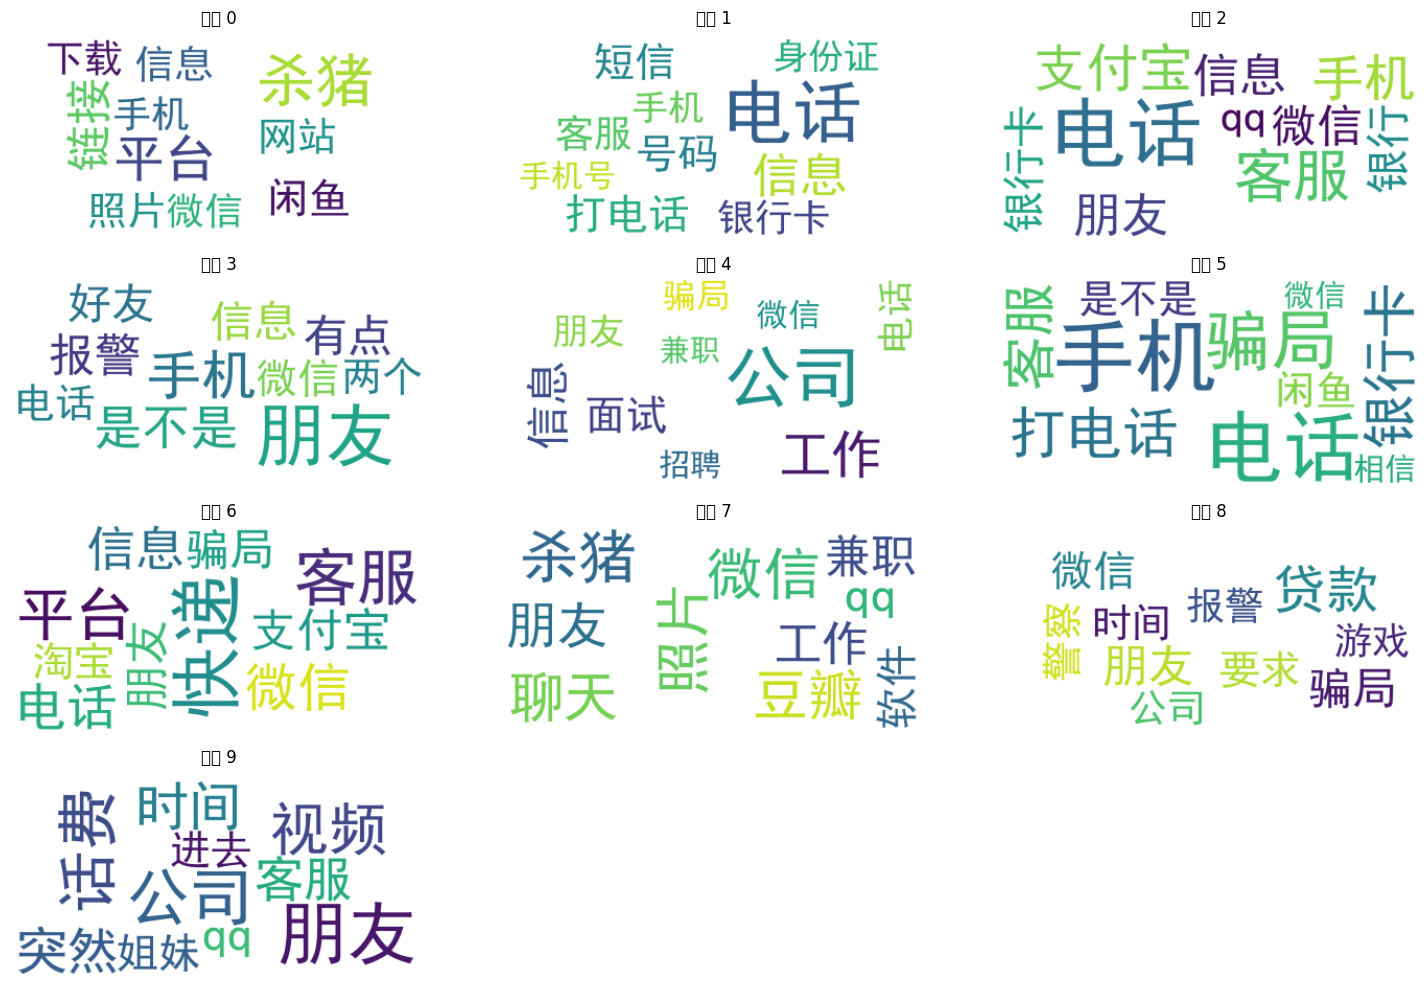

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# 绘制主题的关键词
def plot_topic_keywords(lda_model, num_topics):
    plt.figure(figsize=(15, 10))
    
    # 设置中文字体路径
    font_path = 'D:/CITYU/5507/作业/停用词/simhei.ttf/simhei.ttf'  # 替换为实际的字体文件路径
    
    for topic_id in range(num_topics):
        plt.subplot(4, 3, topic_id + 1)
        plt.title(f"主题 {topic_id}")
        words = lda_model.show_topic(topic_id, topn=10)
        word_dict = dict(words)
        
        # 使用中文词云
        wordcloud = WordCloud(
            width=400,
            height=200,
            background_color='white',
            font_path=font_path,  # 使用定义的字体路径
            stopwords=STOPWORDS
        ).generate_from_frequencies(word_dict)
        
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# 绘制主题关键词
plot_topic_keywords(lda_model, num_topics)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25972 (\N{CJK UNIFIED IDEOGRAPH-6574}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py

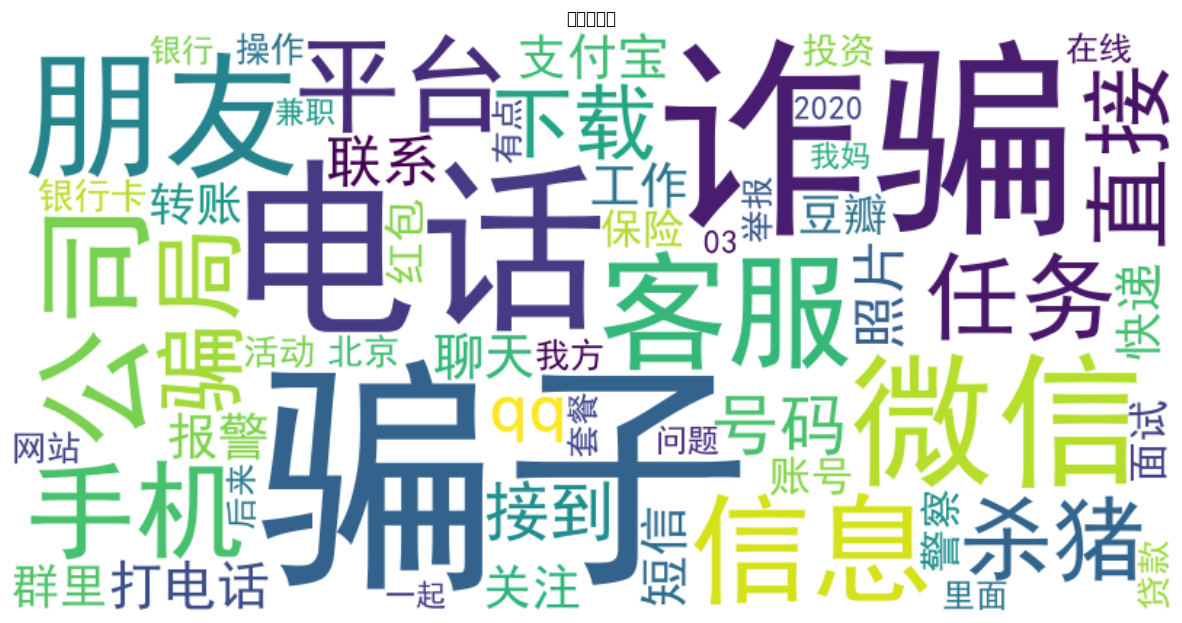

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# 绘制一个大的词云图
def plot_combined_wordcloud(lda_model, num_topics):
    # 设置中文字体路径
    font_path = 'D:/CITYU/5507/作业/停用词/simhei.ttf'  # 替换为实际的字体文件路径
    
    combined_words = {}

    # 收集所有主题的词汇及其频率
    for topic_id in range(num_topics):
        words = lda_model.show_topic(topic_id, topn=10)
        for word, freq in words:
            if word in combined_words:
                combined_words[word] += freq  # 如果词汇已存在，则累加频率
            else:
                combined_words[word] = freq  # 否则，创建新条目

    # 生成词云
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        font_path=font_path,
        stopwords=STOPWORDS
    ).generate_from_frequencies(combined_words)

    # 显示词云
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("整体词云图")
    plt.show()

# 绘制大的词云图
plot_combined_wordcloud(lda_model, num_topics)